from: https://towardsdatascience.com/the-4-convolutional-neural-network-models-that-can-classify-your-fashion-images-9fe7f3e5399d
<br>
data: https://github.com/zalandoresearch/fashion-mnist
<br>
youtube: https://www.youtube.com/watch?v=wQ8BIBpya2k

In [8]:
import numpy as np
import pandas as pd

In [27]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist # 28 by 28 images for digits 0-9

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = tf.keras.utils.normalize(X_train, axis=1) # normalize X_Train
X_test = tf.keras.utils.normalize(X_test, axis=1) # normalize X_test

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) # takes in image and flatten
model.add(tf.keras.layers.Dense(128 # hidden layer 1
                               , activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128 # hidden layer 2
                               , activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10 # out put 10 for the 10 digits
                               , activation=tf.nn.softmax))

model.compile(optimizer = 'adam' 
             , loss = 'sparse_categorical_crossentropy'
             , metrics = ['accuracy'])
model.fit(X_train
          , y_train
          , epochs = 3)
          

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2618 - accuracy: 0.9229
Epoch 2/3
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1079 - accuracy: 0.9675
Epoch 3/3
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0735 - accuracy: 0.9770


In [30]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(f'Loss: {val_loss}, Accuracy: {val_acc}')

10000/10000 [==============================] - 0s 25us/sample - loss: 0.0864 - accuracy: 0.9735
Loss: 0.08639592907615005, Accuracy: 0.9735000133514404


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

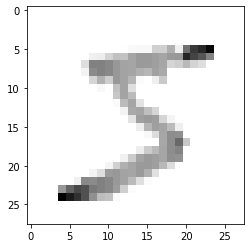

In [26]:
plt.imshow(X_train[0], cmap=plt.cm.binary);

In [31]:
model.save('mnist_0_9_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mnist_0_9_reader.model/assets


In [32]:
new_model = tf.keras.models.load_model('mnist_0_9_reader.model')

In [36]:
type(X_test)

numpy.ndarray

In [37]:
predictions = new_model.predict(X_test)

In [38]:
print(np.argmax(predictions[0]))

7


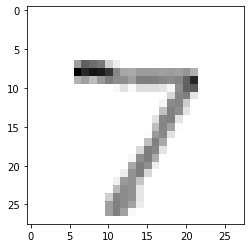

In [40]:
plt.imshow(X_test[0], cmap=plt.cm.binary);